# PSM（Page Segmentation Mode）を試す

In [1]:
#coding:utf-8
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pyocr
import pyocr.builders

# matplotlibをJupyterでインライン表示するための宣言
%matplotlib inline

#### 独自のユーティリティ.pyファイル読み込み

In [2]:
import utils.pyocr_util as pyocr_util
import utils.text_util as text_util
import utils.cv_util as cv_util

### 設定

In [3]:
NAMECARD_IMAGE_FOLDER = "../data/01_namecard/"
NAMECARD_DATA_FOLDER = "../data/02_namecard_data/"

### PyOCRのセットアップ　画像と正解データの読み込み

pyocr tools count = 2
tool[0].tool.get_name() = Tesseract (sh)
tool[1].tool.get_name() = Tesseract (C-API)
use tool =Tesseract (sh)
pyocr langs  = eng, eng_best, jpn, jpn_best, jpn_vert, osd


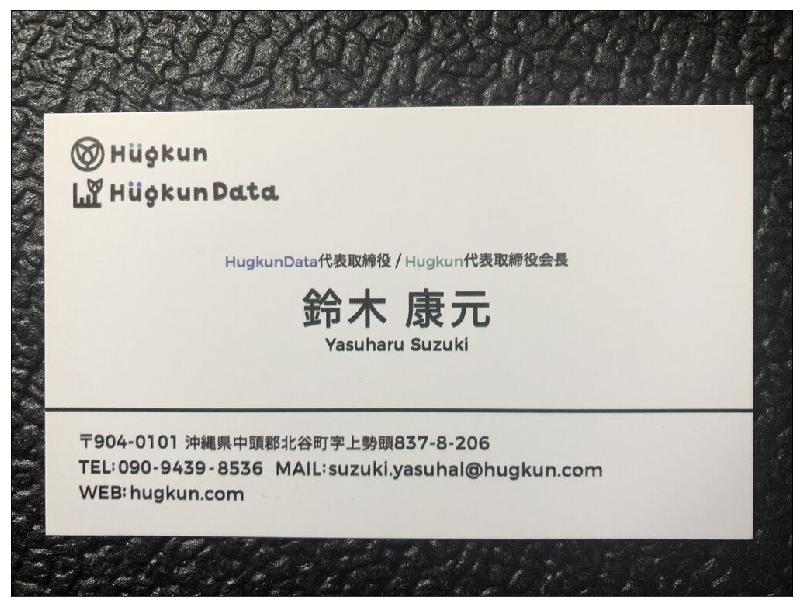

In [4]:
pyocr_tool = pyocr_util.pyocr_init()
test_path = NAMECARD_IMAGE_FOLDER + "001_hugkun_yasubei.jpg"
img_src = cv_util.read_image_rgb(test_path)
test_data_path = NAMECARD_DATA_FOLDER + "001_hugkun_yasubei.txt"
y = text_util.read_text(test_data_path)
cv_util.show_color(img_src)

### LineBoxBuilderで領域情報を取得し、画像へ描画する (おさらい)

In [5]:
def concat_tesseract_boxes_result (tesseract_boxes):
    result = ""
    for box_index in range(len(tesseract_boxes)):
        tesseract_box = tesseract_boxes[box_index]
        result += tesseract_box.content
        result += "\n"
    return result    

ratio=0.7888193484219974


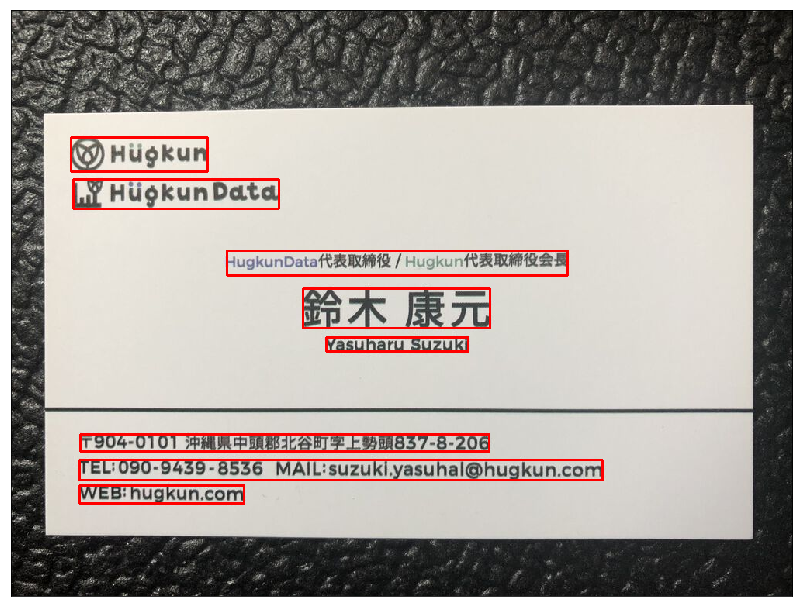

In [6]:
new_im = Image.fromarray(img_src)
test_line_boxes = pyocr_tool.image_to_string(new_im, lang="jpn",
    builder=pyocr.builders.LineBoxBuilder(tesseract_layout=1))
img_drawen = cv_util.draw_tesseract_boxes(img_src.copy(), test_line_boxes)
ratio = text_util.calc_text_ratio(concat_tesseract_boxes_result(test_line_boxes),y)
print(f"ratio={ratio}")

cv_util.show_color(img_drawen)

## PSMを切り替えて領域情報を書き込む

In [7]:
psm_list = [1] + list(range(3,14))
psm_list

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

PSM01 ratio=78.88% time=1.97s


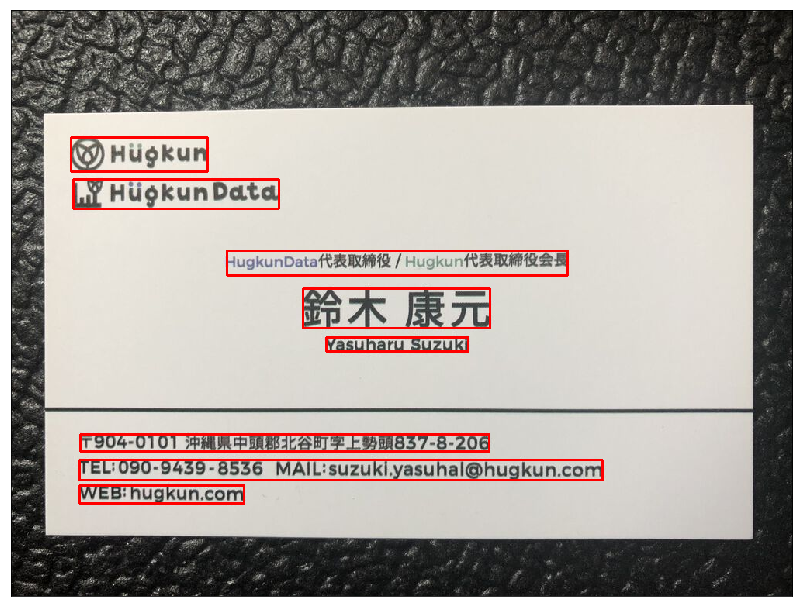

PSM03 ratio=78.88% time=1.61s


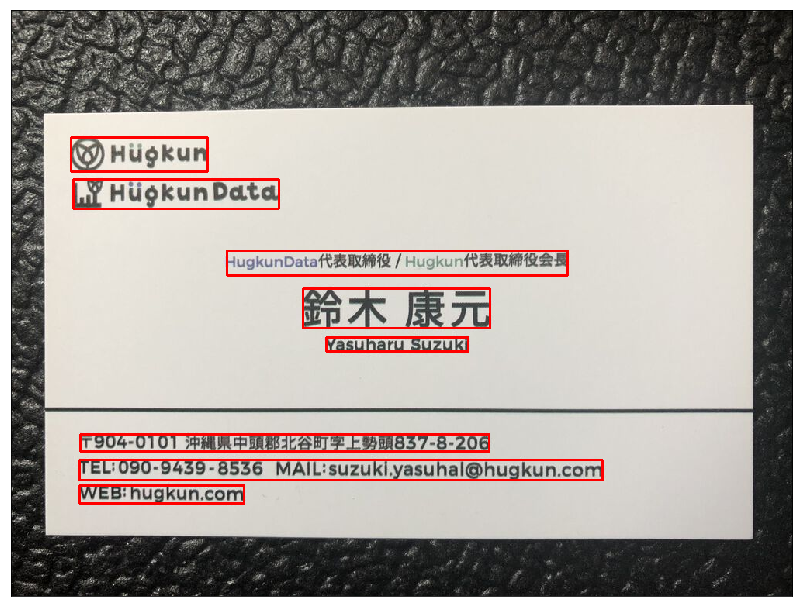

PSM04 ratio=78.98% time=1.54s


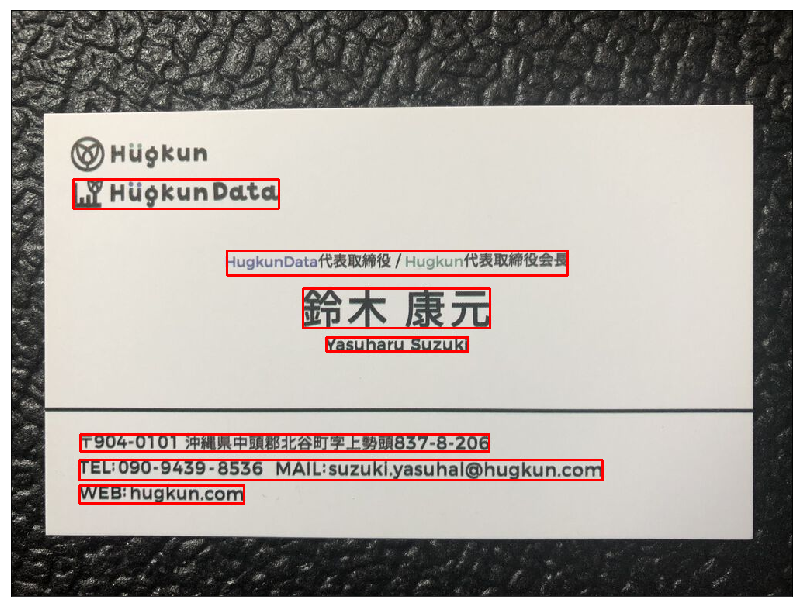

PSM05 ratio=8.44% time=3.82s


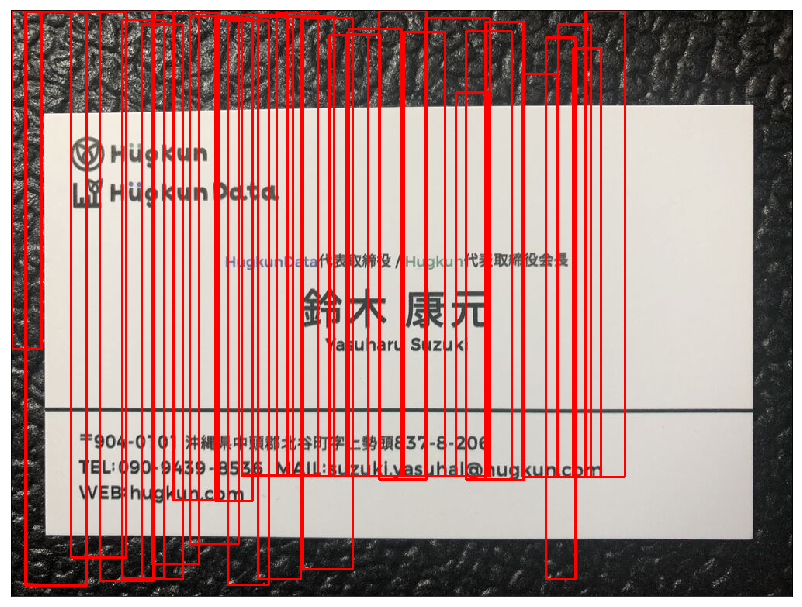

PSM06 ratio=49.81% time=3.26s


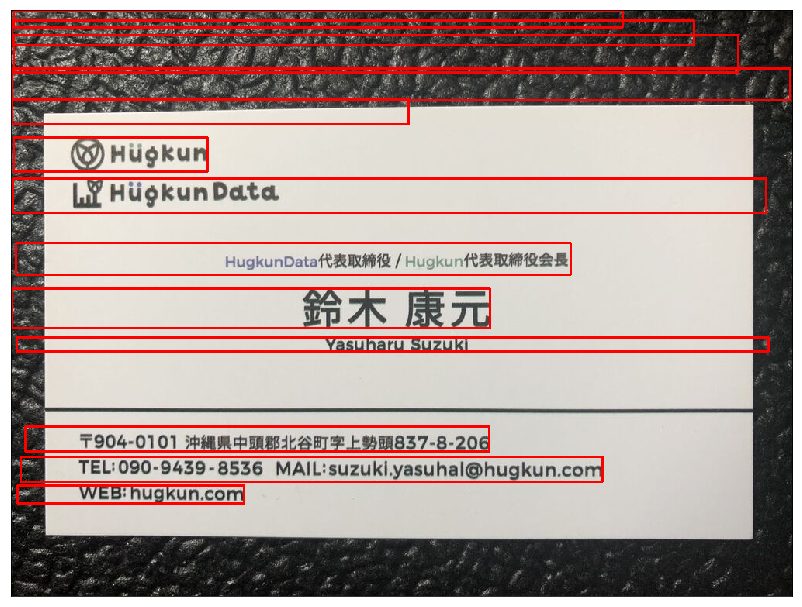

PSM07 ratio=0.00% time=0.833s


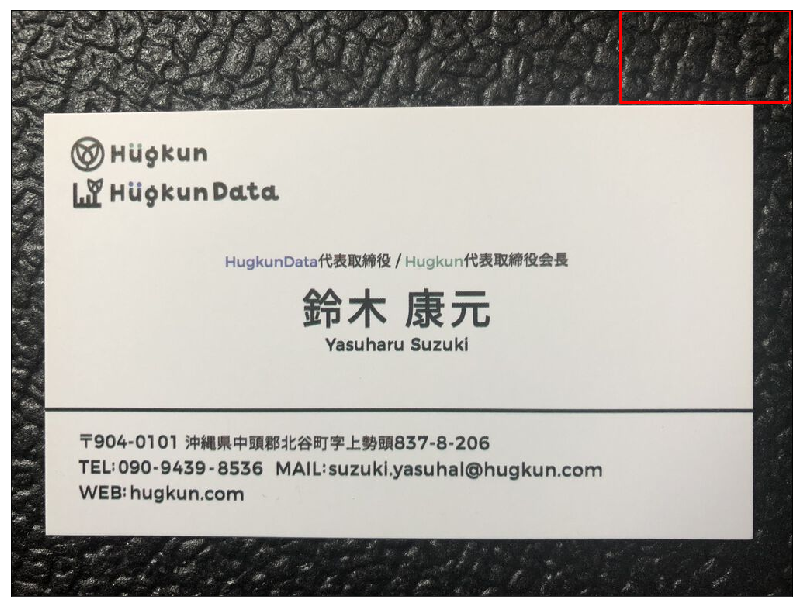

PSM08 ratio=0.00% time=1.24s


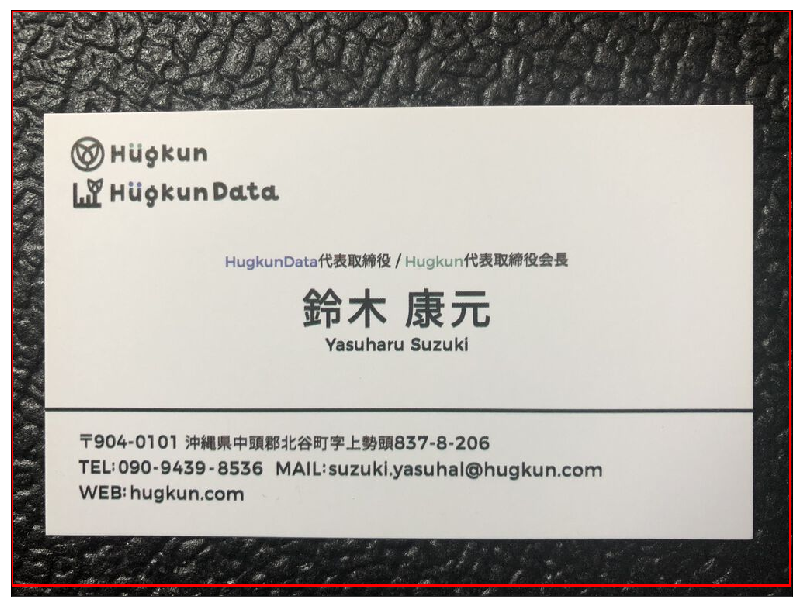

PSM09 ratio=0.00% time=1.17s


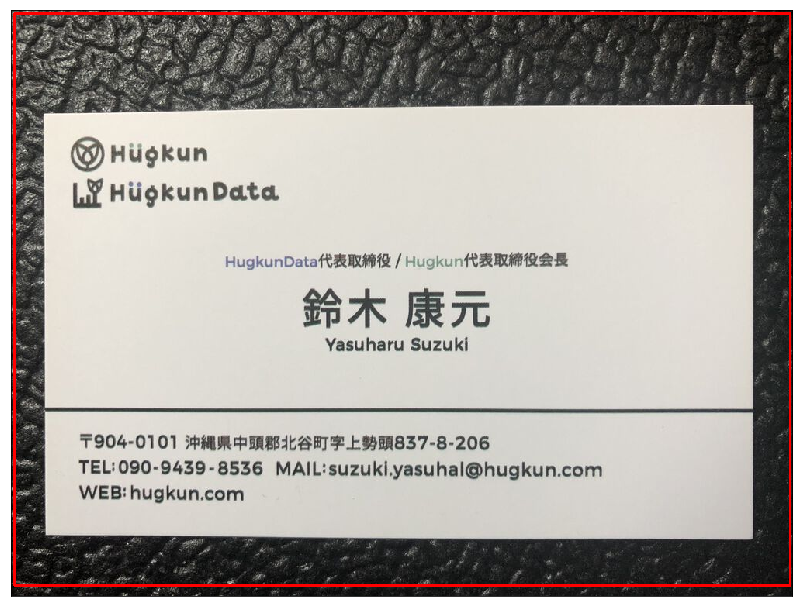

PSM10 ratio=0.00% time=0.716s


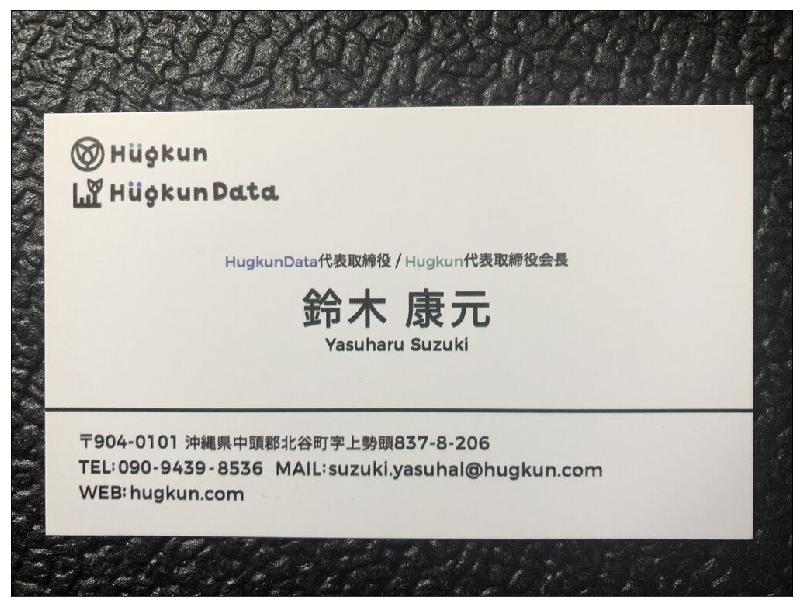

PSM11 ratio=72.72% time=1.62s


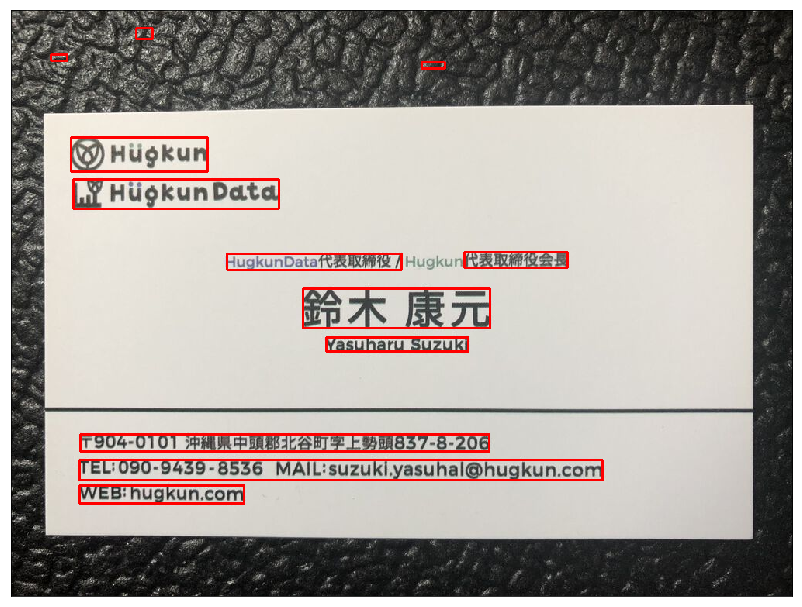

PSM12 ratio=73.19% time=1.95s


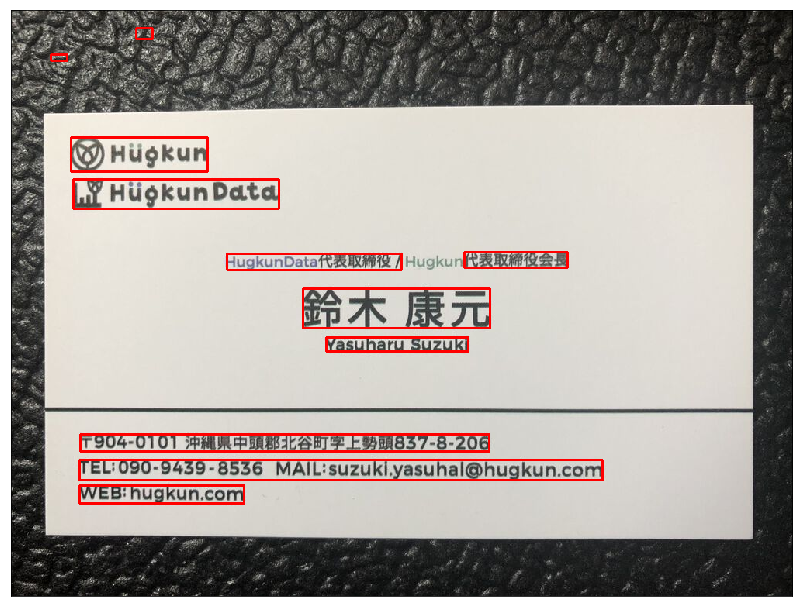

PSM13 ratio=1.08% time=15.0s


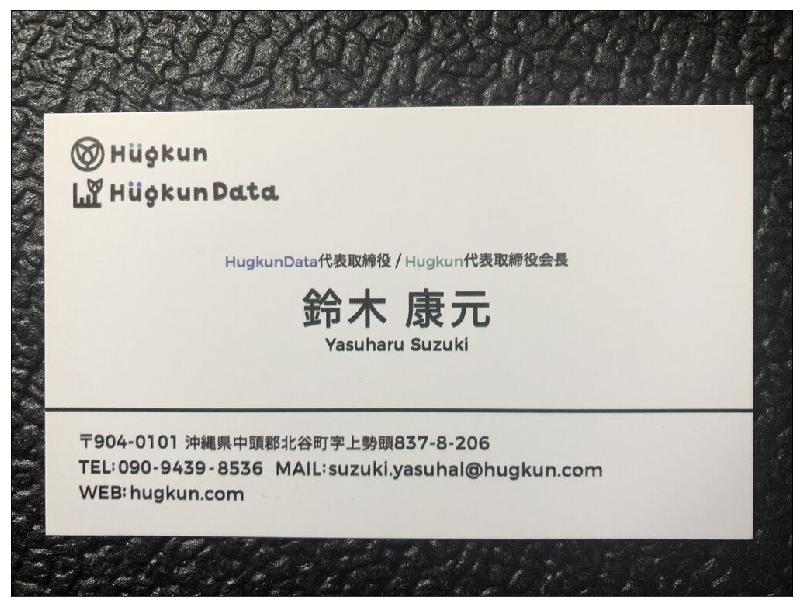

In [12]:
import time

for psm_number in psm_list:
    start_time = time.time() # 開始時刻
    test_line_boxes = pyocr_tool.image_to_string(new_im, lang="jpn",
        builder=pyocr.builders.LineBoxBuilder(tesseract_layout=psm_number))
    end_time = time.time() - start_time
    img_drawen = cv_util.draw_tesseract_boxes(img_src.copy(), test_line_boxes)
    ratio = text_util.calc_text_ratio(concat_tesseract_boxes_result(test_line_boxes),y)
    print(f"PSM{psm_number:02} ratio={ratio*100:0.2f}% time={end_time:0.3}s")
    cv_util.show_color(img_drawen)